### Test the AC-GAN model

In [1]:
import os
import numpy as np
import random
import torch
import torch.nn as nn
import torch.utils.data
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torchvision.utils as vutils
from torch.autograd import Variable
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
from torchvision.utils import save_image

import torch.nn.functional as F
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
from IPython.display import HTML
from acgan_network import Generator
%matplotlib inline

In [2]:
MODEL_FOLDER = "Model"

In [3]:
cuda = True if torch.cuda.is_available() else False
FloatTensor = torch.cuda.FloatTensor if cuda else torch.FloatTensor
LongTensor = torch.cuda.LongTensor if cuda else torch.LongTensor

In [4]:
#load model back and test
cuda = True if torch.cuda.is_available() else False
PATH_TO_MODEL = "Model/deepweeds_acgan_gan_v3.pth"
gen_model = Generator(9)
gen_model.load_state_dict(torch.load(PATH_TO_MODEL))
gen_model.eval()
if cuda:
    gen_model.cuda()

In [5]:

plt.rcParams["figure.figsize"] = (5,10)

def show_tensor_images(image_tensor, label, num_images=25, size=(3, 64, 64), nrow=5, show=True):
    '''
    Function for visualizing images: Given a tensor of images, number of images, and
    size per image, plots and prints the images in an uniform grid.
    '''
    image_tensor = (image_tensor + 1) / 2
    image_unflat = image_tensor.detach().cpu()
    image_grid = make_grid(image_unflat[:num_images], nrow=9)
    plt.imshow(image_grid.permute(1, 2, 0).squeeze())
    plt.title(f"Fake Image for all {label}")


    if show:
        plt.show()

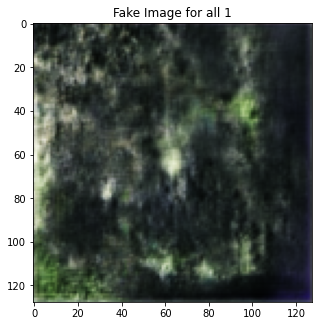

In [6]:
n_row = 1
latent_dim = 100
rng = np.random.default_rng()
z = Variable(FloatTensor(np.random.normal(0, n_row, (n_row, latent_dim))))
    # Get labels ranging from 0 to n_classes for n rows
labels = rng.integers(9, size=1)
txt = labels[0]
labels = Variable(LongTensor(labels))
gen_imgs = gen_model(z, labels)


show_tensor_images(gen_imgs, txt, 9, (128,128))


#### Generate Test Images

In [10]:
#generate 17509 images
#assuming data directory at data/test_generated
import os
save_dir = "data/test_generated/"
if not os.path.isdir(save_dir):
    os.mkdir(save_dir)

total_images = 17509
n_row = 1 #one image at  a time
latent_dim = 100
rng = np.random.default_rng()
filenames = []
targets = []
for i in range (total_images):
    
    z = Variable(FloatTensor(np.random.normal(0, n_row, (n_row, latent_dim))))
        # Get labels ranging from 0 to n_classes for n rows
    labels = rng.integers(9, size=1)
    targets.append(labels[0])
    
    
    filename = f"000{i}.jpg"
    directory = f"data/test_generated/{labels[0]}/" 
    filenames.append(filename)
    
    #generate image with given label
    labels = Variable(LongTensor(labels))
    gen_imgs = gen_model(z, labels)
    
    save_image(gen_imgs.data, directory + filename, nrow=n_row, normalize=True)


In [14]:
import pandas as pd
LABEL_PATH = "data/test_generated_label/"
df = pd.DataFrame({"Filename": filenames, "Label": targets})
df_split = np.array_split(df, 5)
for idx in range(len(df_split)):
    df_split[idx].to_csv("{}/test_subset{}.csv".format(LABEL_PATH, idx))

In [ ]:
# #have to split up the label files to run the resnet test
# import pandas as pd
# LABEL_PATH = "data/test_generated_label/"

# df = pd.read_csv("data/test_generated_label/generated_data_labels.csv")

               